In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
img_height, img_width = 64, 64
batch_size = 50

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/anikr/OneDrive/Desktop/LAST SEMESTER/465/Project/dataset/Train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/anikr/OneDrive/Desktop/LAST SEMESTER/465/Project/dataset/Validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/anikr/OneDrive/Desktop/LAST SEMESTER/465/Project/dataset/Test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 800 files belonging to 10 classes.
Found 100 files belonging to 10 classes.
Found 100 files belonging to 10 classes.


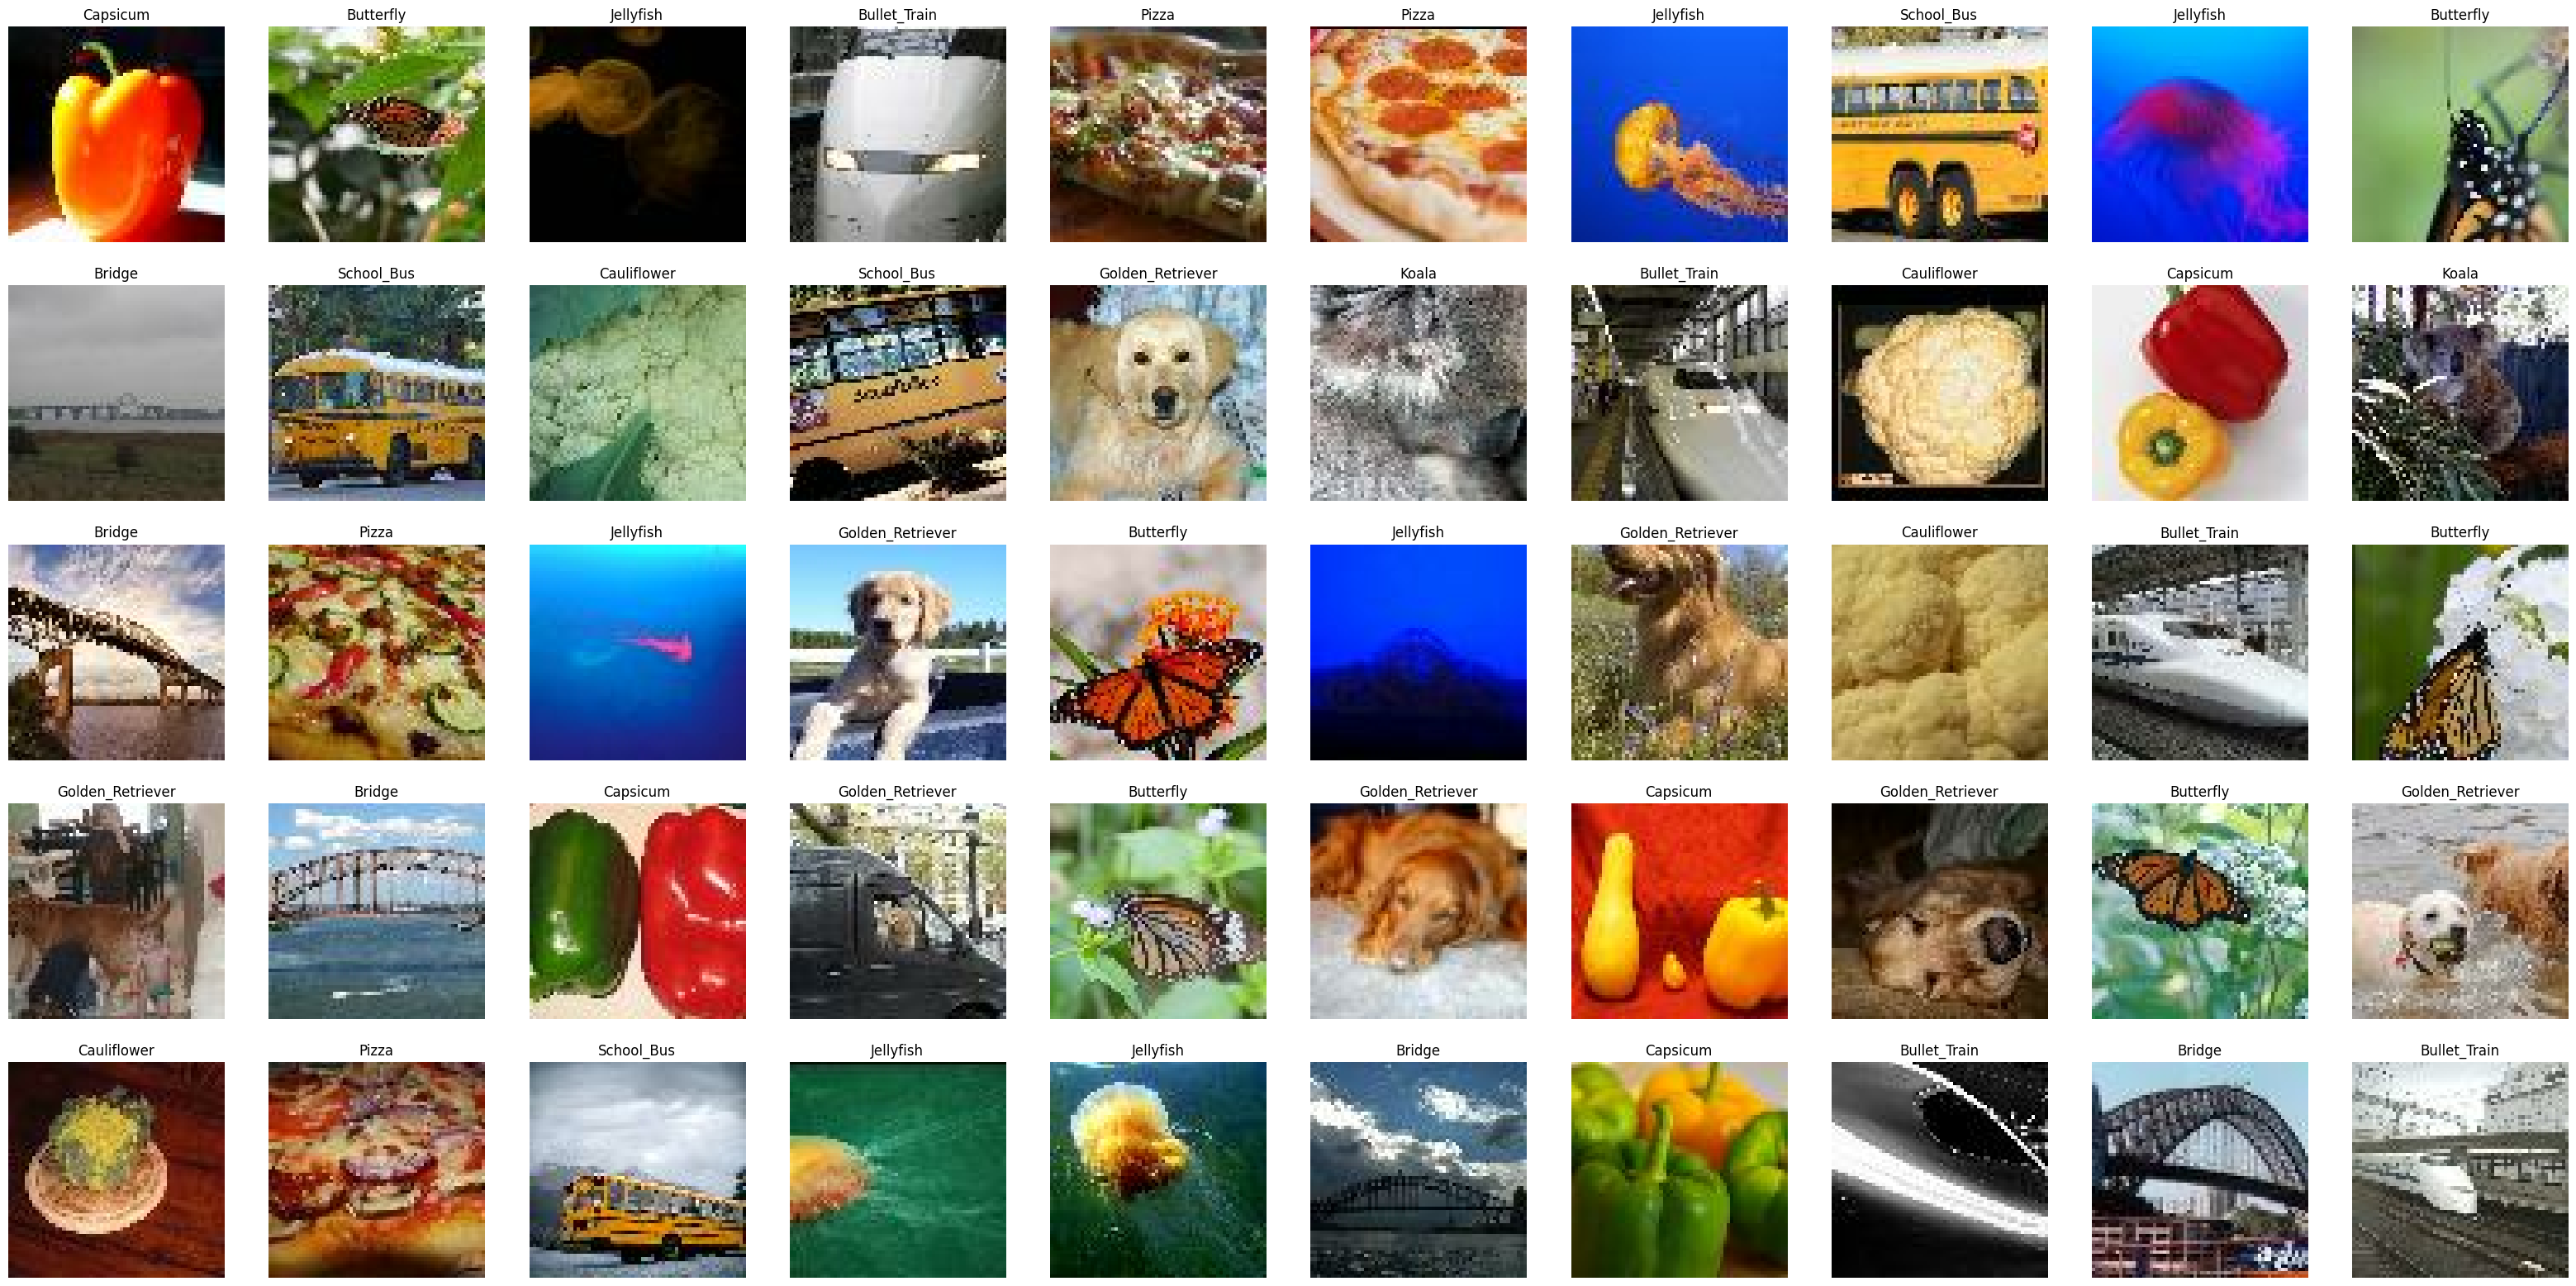

In [4]:
class_names = ["Bridge", "Bullet_Train", "Butterfly","Capsicum", "Cauliflower", "Golden_Retriever","Jellyfish", "Koala", "Pizza", "School_Bus"]
plt.figure(figsize=(40,40))
for images, labels in train_ds.take(1):
  for i in range(50):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(64, 64, 3)),
     tf.keras.layers.Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dropout(0.4),
     tf.keras.layers.Dense(250, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10,activation="softmax"),
    ]
)


In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
16/16 [==============================] - 14s 773ms/step - loss: 2.4623 - accuracy: 0.1513 - val_loss: 2.0914 - val_accuracy: 0.2000
Epoch 2/20
16/16 [==============================] - 9s 585ms/step - loss: 2.0112 - accuracy: 0.2425 - val_loss: 1.8363 - val_accuracy: 0.3200
Epoch 3/20
16/16 [==============================] - 9s 577ms/step - loss: 1.8858 - accuracy: 0.2800 - val_loss: 1.7941 - val_accuracy: 0.2800
Epoch 4/20
16/16 [==============================] - 9s 578ms/step - loss: 1.7272 - accuracy: 0.3750 - val_loss: 1.7398 - val_accuracy: 0.2800
Epoch 5/20
16/16 [==============================] - 9s 563ms/step - loss: 1.6318 - accuracy: 0.4288 - val_loss: 1.6883 - val_accuracy: 0.4300
Epoch 6/20
16/16 [==============================] - 9s 583ms/step - loss: 1.4780 - accuracy: 0.4863 - val_loss: 1.6743 - val_accuracy: 0.4000
Epoch 7/20
16/16 [==============================] - 9s 564ms/step - loss: 1.2924 - accuracy: 0.5412 - val_loss: 1.4329 - val_accuracy: 0.5100
Epoch

In [9]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)


print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


2/2 [==============================] - 0s 79ms/step - loss: 0.9786 - accuracy: 0.7000
Test Loss: 0.9786
Test Accuracy: 70.00%


In [26]:
import numpy as np
total_params = model.count_params()

print(f"Total Parameters: {total_params}")

# Define input dimensions and batch size
input_shape = (64, 64, 3)
batch_size = 50

input_size = input_shape[0] * input_shape[1] * input_shape[2]
num_computations = total_params * batch_size * input_size

print(f"Total Computations: {num_computations}")

Total Parameters: 16247985
Total Computations: 9982761984000


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 125)       84500     
                                                        

In [28]:
pip install tflop

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tflop (from versions: none)
ERROR: No matching distribution found for tflop


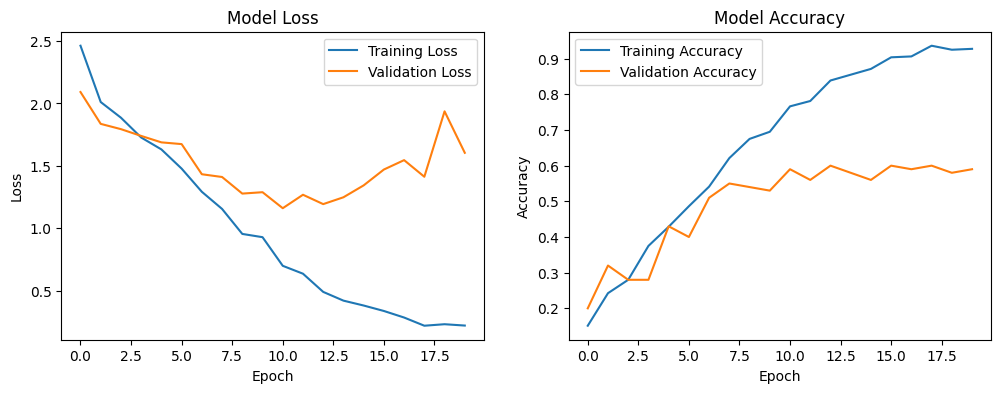

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


4/4 [==============================] - 0s 48ms/step


<Figure size 1000x1000 with 0 Axes>

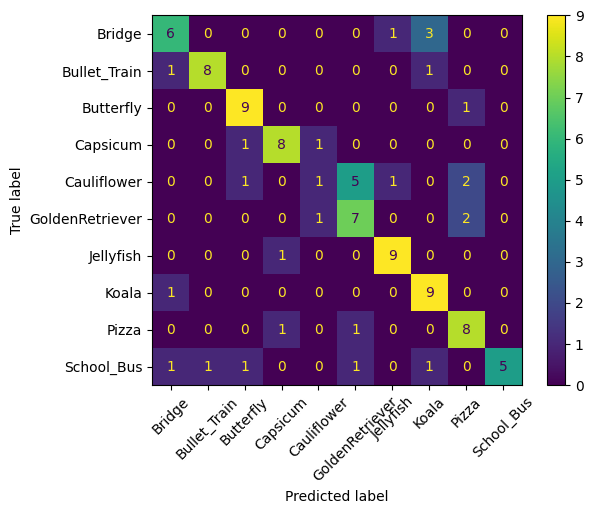

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


test_images = []
test_labels = []


for images, labels in test_ds:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


cm = confusion_matrix(test_labels, predicted_labels)

class_names = ["Bridge", "Bullet_Train", "Butterfly", "Capsicum", "Cauliflower", "GoldenRetriever", "Jellyfish", "Koala", "Pizza", "School_Bus"]

plt.figure(figsize=(10, 10))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis')
plt.xticks(rotation=45) 
plt.show()


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


predicted_labels = np.argmax(predictions, axis=1)


accuracy = accuracy_score(test_labels, predicted_labels)


precision = precision_score(test_labels, predicted_labels, average=None)
recall = recall_score(test_labels, predicted_labels, average=None)

print(f"Accuracy: {accuracy:.2f}")


report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:\n", report)


Accuracy: 0.70

Classification Report:
                  precision    recall  f1-score   support

         Bridge       0.67      0.60      0.63        10
   Bullet_Train       0.89      0.80      0.84        10
      Butterfly       0.75      0.90      0.82        10
       Capsicum       0.80      0.80      0.80        10
    Cauliflower       0.33      0.10      0.15        10
GoldenRetriever       0.50      0.70      0.58        10
      Jellyfish       0.82      0.90      0.86        10
          Koala       0.64      0.90      0.75        10
          Pizza       0.62      0.80      0.70        10
     School_Bus       1.00      0.50      0.67        10

       accuracy                           0.70       100
      macro avg       0.70      0.70      0.68       100
   weighted avg       0.70      0.70      0.68       100



In [17]:
model_ff = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(64,64,3)),
     tf.keras.layers.Dense(4096, activation='relu'),
     tf.keras.layers.Dense(2048, activation='relu'),
     tf.keras.layers.Dense(1024, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [18]:
model_ff.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [19]:
history = model_ff.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
16/16 [==============================] - 12s 669ms/step - loss: 3492.3630 - accuracy: 0.0850 - val_loss: 390.8066 - val_accuracy: 0.1000
Epoch 2/20
16/16 [==============================] - 11s 655ms/step - loss: 267.2858 - accuracy: 0.1088 - val_loss: 89.8135 - val_accuracy: 0.1000
Epoch 3/20
16/16 [==============================] - 11s 658ms/step - loss: 42.2255 - accuracy: 0.1400 - val_loss: 22.1177 - val_accuracy: 0.1200
Epoch 4/20
16/16 [==============================] - 10s 648ms/step - loss: 11.4906 - accuracy: 0.1813 - val_loss: 4.2442 - val_accuracy: 0.2300
Epoch 5/20
16/16 [==============================] - 11s 654ms/step - loss: 2.8591 - accuracy: 0.3262 - val_loss: 2.0094 - val_accuracy: 0.3000
Epoch 6/20
16/16 [==============================] - 10s 650ms/step - loss: 1.9854 - accuracy: 0.3750 - val_loss: 2.2513 - val_accuracy: 0.2700
Epoch 7/20
16/16 [==============================] - 10s 645ms/step - loss: 1.6926 - accuracy: 0.4325 - val_loss: 1.8884 - val_accur

In [21]:
test_loss_ff, test_accuracy_ff = model_ff.evaluate(test_ds)


print(f"Test Loss (Feedforward): {test_loss_ff:.4f}")
print(f"Test Accuracy (Feedforward): {test_accuracy_ff * 100:.2f}%")


2/2 [==============================] - 0s 58ms/step - loss: 1.6983 - accuracy: 0.4600
Test Loss (Feedforward): 1.6983
Test Accuracy (Feedforward): 46.00%


In [25]:
# Calculate the total number of parameters
total_params = model_ff.count_params()

print(f"Total Parameters: {total_params}")

# Define input dimensions and batch size
input_shape = (64, 64, 3)
batch_size = 50

# Calculate the number of computations for a forward pass
input_size = input_shape[0] * input_shape[1] * input_shape[2]
num_computations = total_params * batch_size * input_size

print(f"Total Computations: {num_computations}")

Total Parameters: 61483274
Total Computations: 37775323545600


In [29]:
model_ff.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              50335744  
                                                                 
 dense_4 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)               

In [30]:
# Calculate the number of parameters
num_parameters = sum([tf.keras.backend.count_params(w) for w in model_ff.trainable_weights])

# Define a sample input shape for computing computations
sample_input = tf.ones((1, 64, 64, 3))

# Calculate the number of computations
outputs = model_ff(sample_input, training=False)
num_computations = tf.profiler.experimental.profile(model_ff, input_tensors=[sample_input], verbose=0).total_parameters
# Display the results
print(f"Number of parameters in the model: {num_parameters}")
print(f"Number of computations in the model: {num_computations}")

AttributeError: module 'tensorflow._api.v2.profiler.experimental' has no attribute 'profile'

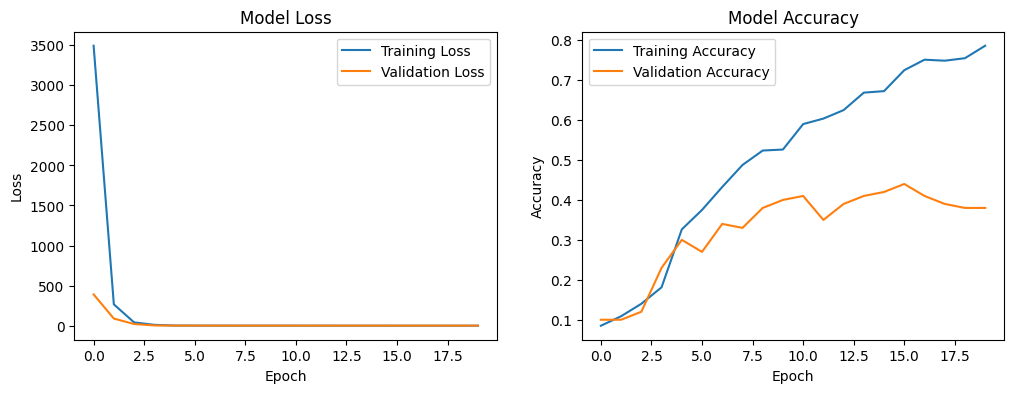

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

4/4 [==============================] - 0s 39ms/step


<Figure size 1000x1000 with 0 Axes>

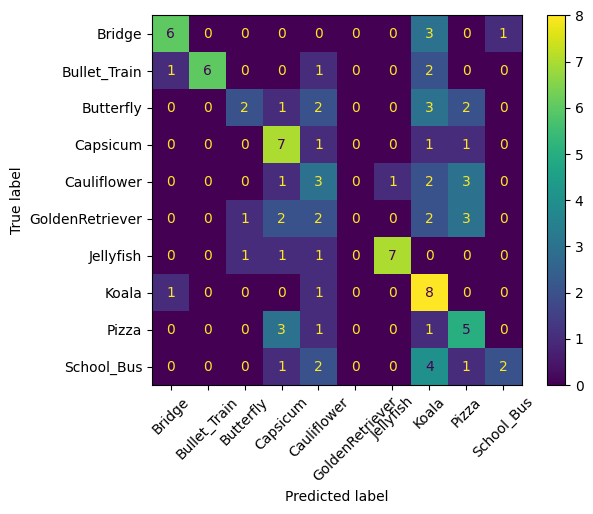

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


test_images = []
test_labels = []


for images, labels in test_ds:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = model_ff.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


cm = confusion_matrix(test_labels, predicted_labels)

class_names = ["Bridge", "Bullet_Train", "Butterfly", "Capsicum", "Cauliflower", "GoldenRetriever", "Jellyfish", "Koala", "Pizza", "School_Bus"]

plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis')
plt.xticks(rotation=45)
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


predicted_labels = np.argmax(predictions, axis=1)


accuracy = accuracy_score(test_labels, predicted_labels)


precision = precision_score(test_labels, predicted_labels, average=None)
recall = recall_score(test_labels, predicted_labels, average=None)

print(f"Accuracy: {accuracy:.2f}")


report = classification_report(test_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:\n", report)


Accuracy: 0.46

Classification Report:
                  precision    recall  f1-score   support

         Bridge       0.75      0.60      0.67        10
   Bullet_Train       1.00      0.60      0.75        10
      Butterfly       0.50      0.20      0.29        10
       Capsicum       0.44      0.70      0.54        10
    Cauliflower       0.21      0.30      0.25        10
GoldenRetriever       0.00      0.00      0.00        10
      Jellyfish       0.88      0.70      0.78        10
          Koala       0.31      0.80      0.44        10
          Pizza       0.33      0.50      0.40        10
     School_Bus       0.67      0.20      0.31        10

       accuracy                           0.46       100
      macro avg       0.51      0.46      0.44       100
   weighted avg       0.51      0.46      0.44       100



C:\Users\anikr\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anikr\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anikr\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anikr\.conda\envs\tf\lib\site-packages\sklea